<a href="https://colab.research.google.com/github/antoniorendonc/MathBehindDataScience/blob/main/Metodos_Numericos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodos Numericos Proyecto Integrador Etapa 1
@Antonio Rendon

* Codigo para solucionar los ejercicios

## Metodo de Biseccion

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt


Creamos una funcion con el metodo de la biseccion

In [ ]:
def bisection(func, a, b, tol=0.01):
    """
    Método de Bisección para encontrar raíces de una función.
    """
    iteration = 0  # Inicializa contador de iteraciones

    # Mientras la longitud del intervalo sea mayor que la tolerancia
    while (b - a) / 2.0 > tol:
        iteration += 1  # Incrementa el contador de iteraciones
        print(f"Iteración {iteration}: Intervalo = ({a:.4f}, {b:.4f})")

        # Calcula el punto medio del intervalo
        midpoint = (a + b) / 2.0
        print(f"Punto medio actual: {midpoint:.4f}")

        # Si el valor de la función en el punto medio es cero, hemos encontrado una raíz
        if func(midpoint) == 0:
            print("Raíz encontrada en el punto medio!")
            return midpoint

        # Si el producto de la función en 'a' y en el punto medio es negativo,
        # significa que la raíz está en el intervalo (a, midpoint)
        elif func(a) * func(midpoint) < 0:
            print("La raíz está en la primera mitad del intervalo.")
            b = midpoint  # Actualiza el valor de 'b' al punto medio

        # De lo contrario, la raíz está en el intervalo (midpoint, b)
        else:
            print("La raíz está en la segunda mitad del intervalo.")
            a = midpoint  # Actualiza el valor de 'a' al punto medio

    # Si el bucle termina, devuelve el punto medio del intervalo final como aproximación de la raíz
    print("Método de bisección terminado. Aproximación final:")
    return (a + b) / 2.0


### Ejercicio 5.14
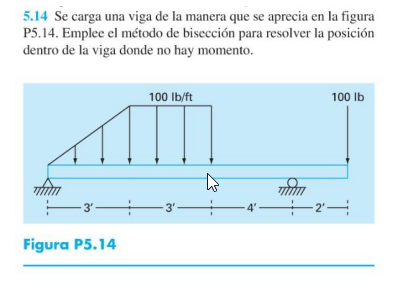

* Función `moment`

La función `moment` calcula el momento en un punto `x` de una viga.

* Cálculo de las Reacciones

- **Reacción R2**: Se basa en el principio de momentos alrededor del punto `0` (extremo izquierdo).
  $$ R2 = \frac{100 \times 12 + 0.5 \times 100 \times 3^2 + 100 \times 3 \times (3 + 1.5)}{10} $$

- **Reacción R1**: Se determina por equilibrio de fuerzas verticales.
  $$ R1 = 100 + 0.5 \times 100 \times 3 + 100 \times 3 - R2 $$

* Cálculo del Momento

- $ x \leq 3$: Momento por carga triangular y `R1`.
- $ 3 < x \leq 6 $: Momento por carga triangular, carga rectangular y `R1`.
- $ 6 < x \leq 10 $: Momento por cargas anteriores y ausencia de carga en este segmento.
- $ x > 10 $: Momento por todas las cargas y `R2`.


In [ ]:
def moment(x):
    """
    Calcula el momento en un punto x.
    """
    # Calculando R2 usando el momento sobre el punto 0
    R2 = (100*12 + 0.5*100*3**2 + 100*3*(3 + 1.5)) / 10
    # Calculando R1 usando el equilibrio de fuerzas verticales
    R1 = 100 + 0.5*100*3 + 100*3 - R2

    if x <= 3:
        return R1*x - (100/6)*x**3
    elif x <= 6:
        return R1*x - (100/6)*3**3 - 100*(x-3)*(x-3/2)
    elif x <= 10:
        return R1*x - (100/6)*3**3 - 100*3*(x-3)
    else:
        return R1*x - (100/6)*3**3 - 100*3*(x-3) - R2*(x-10)


In [ ]:
zero_moment = bisection(moment, 0, 12, 0.01)
print(f"La posición donde no hay momento es aproximadamente x = {zero_moment:.2f} pies.")


Iteración 1: Intervalo = (0.0000, 12.0000)
Punto medio actual: 6.0000
La raíz está en la segunda mitad del intervalo.
Iteración 2: Intervalo = (6.0000, 12.0000)
Punto medio actual: 9.0000
Raíz encontrada en el punto medio!
La posición donde no hay momento es aproximadamente x = 9.00 pies.


Vamos a graficar para comprobar nuestra solucion

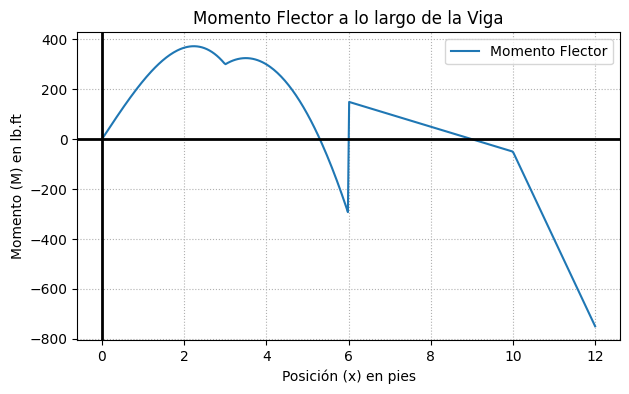

In [ ]:
# Values for plotting
x_values = np.linspace(0, 12, 400)
M_values = [moment(x) for x in x_values]  # No necesitas pasar R1 y R2

# Plotting
plt.figure(figsize=(7,4))
plt.plot(x_values, M_values, label='Momento Flector')
plt.axhline(0, color='black',linewidth=2)
plt.axvline(0, color='black',linewidth=2)
plt.title('Momento Flector a lo largo de la Viga')
plt.xlabel('Posición (x) en pies')
plt.ylabel('Momento (M) en lb.ft')
plt.grid(True, linestyle='dotted')
plt.legend()
plt.show()



__Opcional__ En la grafica se observa que corta en 2 puntos mas en el eje x, para encontrar el otro punto usando nuestro metodo vamos a dividirlo en 2 segmentos y buscaremos en el segmento 0 a 6


In [ ]:
zero_moment_position_1 = bisection(moment, 0, 6, 0.01)
print(f"La posición donde no hay momento es aproximadamente x = {zero_moment_position_1:.2f} pies.")

zero_moment_position_2 = bisection(moment, 5.4, 6.2, 0.01)
print(f"La posición donde no hay momento es aproximadamente x = {zero_moment_position_2:.2f} pies.")

Iteración 1: Intervalo = (0.0000, 6.0000)
Punto medio actual: 3.0000
La raíz está en la segunda mitad del intervalo.
Iteración 2: Intervalo = (3.0000, 6.0000)
Punto medio actual: 4.5000
La raíz está en la segunda mitad del intervalo.
Iteración 3: Intervalo = (4.5000, 6.0000)
Punto medio actual: 5.2500
La raíz está en la segunda mitad del intervalo.
Iteración 4: Intervalo = (5.2500, 6.0000)
Punto medio actual: 5.6250
La raíz está en la primera mitad del intervalo.
Iteración 5: Intervalo = (5.2500, 5.6250)
Punto medio actual: 5.4375
La raíz está en la primera mitad del intervalo.
Iteración 6: Intervalo = (5.2500, 5.4375)
Punto medio actual: 5.3438
La raíz está en la primera mitad del intervalo.
Iteración 7: Intervalo = (5.2500, 5.3438)
Punto medio actual: 5.2969
La raíz está en la segunda mitad del intervalo.
Iteración 8: Intervalo = (5.2969, 5.3438)
Punto medio actual: 5.3203
La raíz está en la primera mitad del intervalo.
Iteración 9: Intervalo = (5.2969, 5.3203)
Punto medio actual: 5.

### Ejercicio 5.15
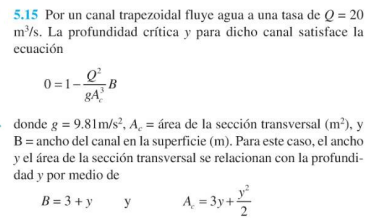

In [ ]:
# ---- Ejercicio 5.15 ----

# Definiciones para el Ejercicio 5.15
g = 9.81  # m/s^2, aceleración debido a la gravedad

def B(y):
    return 3 + y

def Ac(y):
    return y * (3 + y/2)

def equation_5_15(y):
    Q = 20  # m^3/s, tasa de flujo
    return Q - (g * Ac(y) * B(y))**0.5

# Llamada a la función general de bisección para el Ejercicio 5.15
depth_critical = bisection(equation_5_15, 0.5, 2.5)
print(f"Para el Ejercicio 5.15, la profundidad crítica es aproximadamente y = {depth_critical:.2f} m.")


Iteración 1: Intervalo = (0.5000, 2.5000)
Punto medio actual: 1.5000
La raíz está en la segunda mitad del intervalo.
Iteración 2: Intervalo = (1.5000, 2.5000)
Punto medio actual: 2.0000
La raíz está en la segunda mitad del intervalo.
Iteración 3: Intervalo = (2.0000, 2.5000)
Punto medio actual: 2.2500
La raíz está en la primera mitad del intervalo.
Iteración 4: Intervalo = (2.0000, 2.2500)
Punto medio actual: 2.1250
La raíz está en la primera mitad del intervalo.
Iteración 5: Intervalo = (2.0000, 2.1250)
Punto medio actual: 2.0625
La raíz está en la primera mitad del intervalo.
Iteración 6: Intervalo = (2.0000, 2.0625)
Punto medio actual: 2.0312
La raíz está en la primera mitad del intervalo.
Iteración 7: Intervalo = (2.0000, 2.0312)
Punto medio actual: 2.0156
La raíz está en la segunda mitad del intervalo.
Método de bisección terminado. Aproximación final:
Para el Ejercicio 5.15, la profundidad crítica es aproximadamente y = 2.02 m.


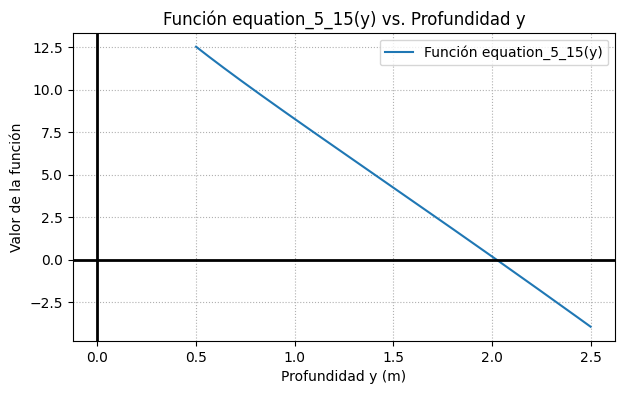

In [ ]:
# Valores para graficar
y_values = np.linspace(0.5, 2.5, 400)
equation_values = [equation_5_15(y) for y in y_values]

# Graficando
plt.figure(figsize=(7,4))
plt.plot(y_values, equation_values, label='Función equation_5_15(y)')
plt.axhline(0, color='black',linewidth=2)
plt.axvline(0, color='black',linewidth=2)
plt.title('Función equation_5_15(y) vs. Profundidad y')
plt.xlabel('Profundidad y (m)')
plt.ylabel('Valor de la función')
plt.grid(True, linestyle='dotted')
plt.legend()
plt.show()


### Ejercicio 6.9
Determine la raiz real mas grande de  $f(x) = 0.95x^3 - 5.9x^2 + 10.9x -6$

a) en forma grafica
b) con el uso del metodo Newton-Raphson (tres iteraciones x1=3.5)
c) con el metodo de la secante (tres iteraciones xi-1=2.5 y xi=3.5 )
Por medio del metodo de la secante modificado (tres iteraciones xi=3.5, sigma=0.01)

##### a) Metodo grafico

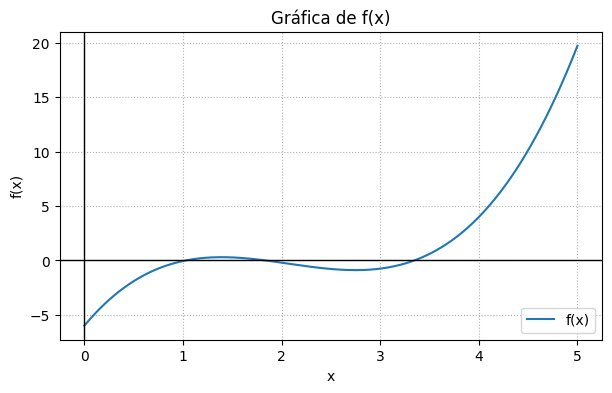

In [ ]:
# a) Metodo grafico
# Primero, vamos a graficar la función para visualizar sus raíces.

import numpy as np
import matplotlib.pyplot as plt

# Definición de la función
def f(x):
    return 0.95*x**3 - 5.9*x**2 + 10.9*x - 6

# Valores para graficar
x_values = np.linspace(0, 5, 400)
f_values = [f(x) for x in x_values]

# Graficando
plt.figure(figsize=(7,4))
plt.plot(x_values, f_values, label='f(x)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Gráfica de f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='dotted')
plt.legend()
plt.show()


##### b) Método de Newton-Raphson

El método de Newton-Raphson es un método iterativo que utiliza la derivada de la función para encontrar la raíz. La fórmula es:

$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
$$
___

En nuestro caso

$ f(x) = 0.95x^3 - 5.9x^2 + 10.9x -6 $


$ f'(x)= 2.85x^2 -11.8x + 10.9 $

In [ ]:
# b) Método de Newton-Raphson

# Definir la función f(x)
def f(x):
    return 0.95*x**3 - 5.9*x**2 + 10.9*x - 6

# Definir la derivada de f(x) para el método de Newton-Raphson
def df(x):
    return 2.85*x**2 - 11.8*x + 10.9


def newton_raphson(x0, n):
    x = x0
    for i in range(n):
        x = x - f(x)/df(x)
        print(f"Iteración {i+1}: x = {x}")  # Imprimir el valor de x en cada iteración

    return x



x1 = 3.5
root_newton = newton_raphson(x1, 3)
print(f"Raíz aproximada con Newton-Raphson: {root_newton}")


Iteración 1: x = 3.365650969529088
Iteración 2: x = 3.345112275776797
Iteración 3: x = 3.3446454317374705
Raíz aproximada con Newton-Raphson: 3.3446454317374705


##### c) Metodo de la secante

El método de la secante es similar al método de Newton-Raphson, pero en lugar de usar la derivada, utiliza dos puntos anteriores para estimar la derivada. La fórmula es:

$$
x_{i+1} = x_i - f(x_i) \frac{x_i - x_{i-1}}{f(x_i) - f(x_{i-1})}
$$

In [ ]:
def secant(x0, x1, n):
    for i in range(n):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        print(f"Iteración {i+1}: x2 = {x2}")  # Imprimir el valor de x2 en cada iteración
        x0, x1 = x1, x2
    return x1

xi_minus_1 = 2.5
xi = 3.5
root_secant = secant(xi_minus_1, xi, 3)
print(f"Raíz aproximada con el método de la secante: {root_secant}")


Iteración 1: x2 = 3.0630630630630677
Iteración 2: x2 = 3.29190623725681
Iteración 3: x2 = 3.3670921038139405
Raíz aproximada con el método de la secante: 3.3670921038139405


##### d) Metodo de la secante modificada

$$
x_{i+1} = x_i - \frac{\sigma f(x_i)}{f(x_i + \sigma) - f(x_i)}
$$

In [ ]:
def modified_secant(x0, sigma, n):
    for i in range(n):
        x1 = x0 + sigma
        x0 = x0 - f(x0) * sigma / (f(x1) - f(x0))
        print(f"Iteración {i+1}: x0 = {x0}")  # Imprimir el valor de x0 en cada iteración
    return x0

xi = 3.5
sigma = 0.01
root_modified_secant = modified_secant(xi, sigma, 3)
print(f"\nRaíz aproximada con el método de la secante modificado: {root_modified_secant}")


Iteración 1: x0 = 3.3668561244535864
Iteración 2: x0 = 3.345395023786194
Iteración 3: x0 = 3.3446539404767193

Raíz aproximada con el método de la secante modificado: 3.3446539404767193


In [ ]:
#Ejercicio 6.26

import numpy as np

def f(h):
    R = 3
    return np.pi * h**2 * ((3*R - h)/3) - 30

def df(h):
    return np.pi * h * (6 - 3*h)

def newton_raphson(h0, n):
    h = h0
    for i in range(n):
        h = h - f(h)/df(h)
        error = abs(f(h)/df(h))
        print(f"Iteración {i+1}: h = {h:.4f}, Error relativo aproximado = {error:.4f}")
    return h

h0 = 3.5
newton_raphson(h0, 3)


Iteración 1: h = 4.3196, Error relativo aproximado = 0.6507
Iteración 2: h = 4.9704, Error relativo aproximado = 0.5336
Iteración 3: h = 5.5040, Error relativo aproximado = 0.4451


5.503974741288594